<a href="https://colab.research.google.com/github/JJJuniorDev/ML-colab/blob/main/svm_linearSVC_RBF_SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEARSVC OVR ACCURACY: 0.9722222222222222


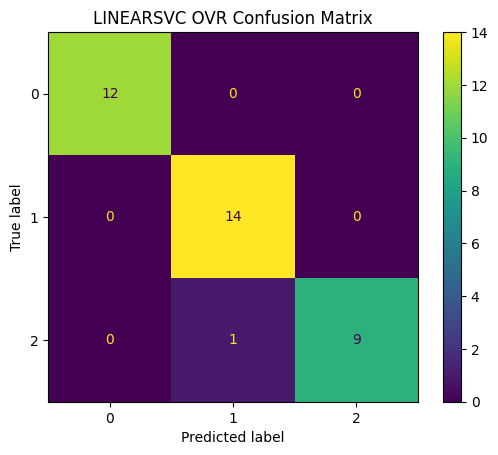

SGD CLF ACCURACY: 0.9722222222222222


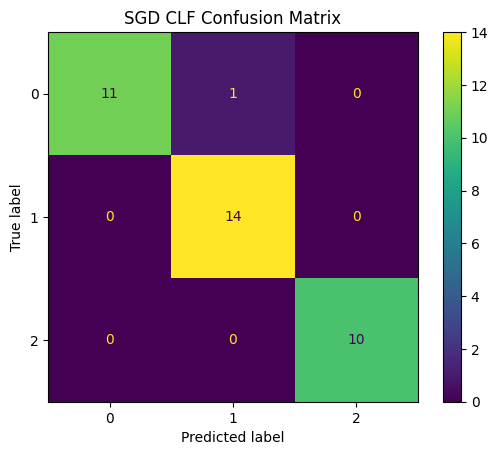

RBF SVC accuracy: 0.9722222222222222


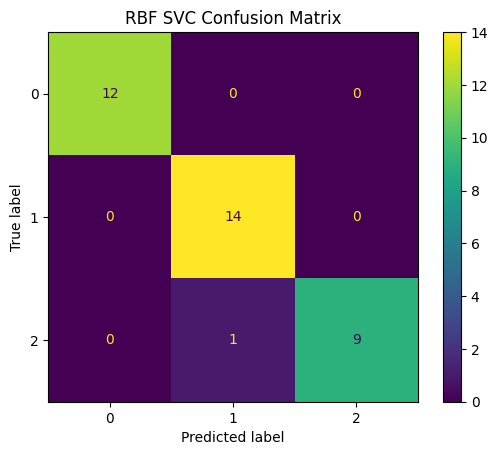

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
OVR_clf= make_pipeline(
    StandardScaler(),
    LinearSVC(random_state=42, max_iter=10000)
)

OVR_clf.fit(X_train, y_train)
y_pred= OVR_clf.predict(X_test);
acc=accuracy_score(y_test, y_pred);
print("LINEARSVC OVR ACCURACY:",acc)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("LINEARSVC OVR Confusion Matrix")
plt.show()


SGD_clf= make_pipeline(
    StandardScaler(),
     SGDClassifier(
        loss="hinge",      # SVM lineare
        alpha=1e-4,
        random_state=42,
        max_iter=1000,
        tol=1e-3
    ))

SGD_clf.fit(X_train, y_train)
y_pred= SGD_clf.predict(X_test);
acc=accuracy_score(y_test, y_pred);
print("SGD CLF ACCURACY:", acc)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("SGD CLF Confusion Matrix")
plt.show()


rbf_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", C=1, gamma="scale")
)
rbf_clf.fit(X_train, y_train)
y_pred_rbf = rbf_clf.predict(X_test)

print("RBF SVC accuracy:", accuracy_score(y_test, y_pred_rbf))

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_rbf)
).plot()
plt.title("RBF SVC Confusion Matrix")
plt.show()
